<a href="https://colab.research.google.com/github/AbhayNath001/YOLOv8-Object-Detection-in-Traffic/blob/main/Latest%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
from IPython import display
display.clear_output()
from ultralytics import YOLO
YOLO().info()

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [2]:
from IPython.display import display, Image
import matplotlib.pyplot as plt

In [4]:
pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.68
    Uninstalling ultralytics-8.2.68:
      Successfully uninstalled ultralytics-8.2.68


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="tLaTp8qStXXzpDLhVN9f")
project = rf.workspace("workspace-ggnpj").project("roadside-object-detection-fytop")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Roadside-Object-Detection-1 in yolov8:: 100%|██████████| 5102/5102 [00:00<00:00, 6194.06it/s]


In [4]:
# loading a pretrained model for training
model = YOLO('yolov8n.pt')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
results5 = model.train(
    data='/content/Roadside-Object-Detection-1/data.yaml',
    epochs=30,
    imgsz=640,
    batch=32,
    lr0=0.0005,
    lrf=0.005,
    momentum=0.95,
    weight_decay=0.0005,
    augment=True,
    patience=10,
    pretrained=True
)

New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Roadside-Object-Detection-1/data.yaml, epochs=30, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

In [10]:
import pandas as pd
import os

# Directory where the training results are saved
results_dir = '/content/runs/detect/train2'  # Change the path if needed

# Load the results.csv file
results_file = os.path.join(results_dir, 'results.csv')
results_df = pd.read_csv(results_file)

# Print the column names
print(results_df.columns)

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


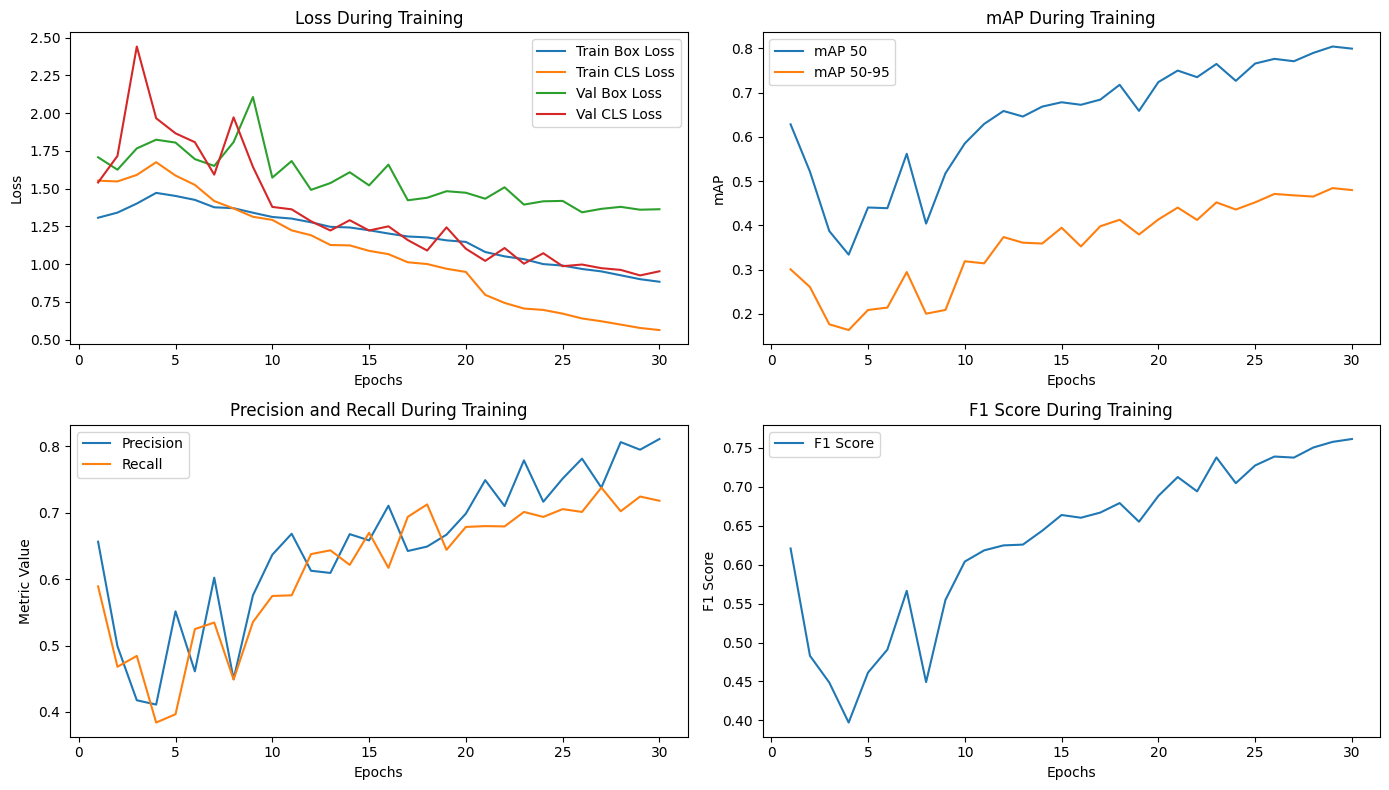

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Directory where the training results are saved
results_dir = '/content/runs/detect/train2'  # Change the path if needed

# Load the results.csv file
results_file = os.path.join(results_dir, 'results.csv')
results_df = pd.read_csv(results_file)

# Strip leading and trailing spaces from column names
results_df.columns = results_df.columns.str.strip()

# Print the column names to confirm
print(results_df.columns)

# Ensure the plots are shown inline
%matplotlib inline

# Plotting the graphs
plt.figure(figsize=(14, 8))

# Loss plots
plt.subplot(2, 2, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train CLS Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Val CLS Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()

# mAP plots
plt.subplot(2, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP 50')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP 50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.title('mAP During Training')
plt.legend()

# Accuracy, Precision, F1 Score (Assuming these metrics are available in the CSV)
if 'metrics/precision(B)' in results_df.columns and 'metrics/recall(B)' in results_df.columns:
    plt.subplot(2, 2, 3)
    plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
    plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.title('Precision and Recall During Training')
    plt.legend()

    plt.subplot(2, 2, 4)
    # F1 Score is typically computed as 2 * (precision * recall) / (precision + recall)
    precision = results_df['metrics/precision(B)']
    recall = results_df['metrics/recall(B)']
    f1_score = 2 * (precision * recall) / (precision + recall)
    plt.plot(results_df['epoch'], f1_score, label='F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('F1 Score During Training')
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
from PIL import Image

# Load the image
image_path = '/content/pic1.jpg'
image = Image.open(image_path)

# Predict objects in the image
results = model.predict(image)


0: 480x640 3 Cars, 26.4ms
Speed: 3.0ms preprocess, 26.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)



0: 448x640 7 Cars, 1 Heavy Vehicle, 24.5ms
Speed: 2.4ms preprocess, 24.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


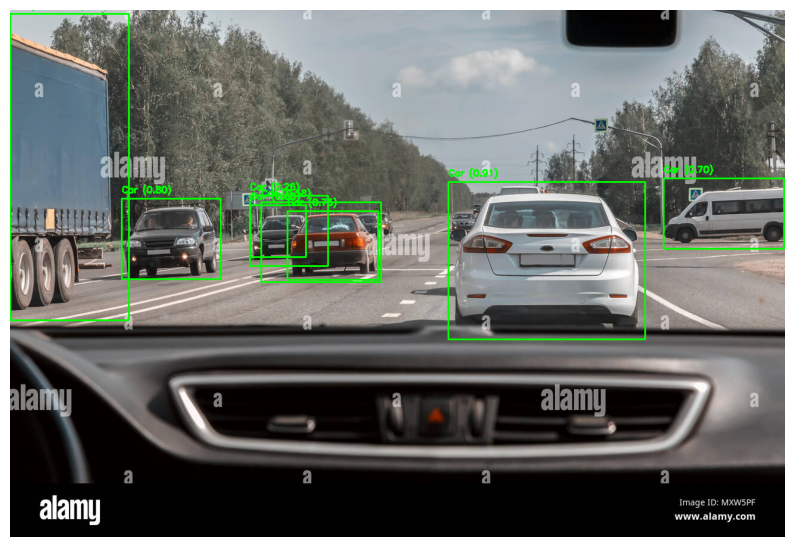

In [28]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the trained model
#model = YOLO('path/to/your/trained/model/best.pt')

# Load the image
image_path = '/content/pic4.jpg'
image = Image.open(image_path)

# Predict objects in the image
results = model.predict(image)

# Function to draw bounding boxes
def draw_boxes(image, boxes, labels, confidences):
    for box, label, confidence in zip(boxes, labels, confidences):
        # Get coordinates
        x1, y1, x2, y2 = map(int, box)
        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Draw label and confidence
        label_text = f"{label} ({confidence:.2f})"
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

# Convert image to numpy array and BGR format for OpenCV
image_np = np.array(image)
image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Extract bounding boxes, labels, and confidences from the results
boxes = results[0].boxes.xyxy.cpu().numpy()
labels = [results[0].names[int(cls)] for cls in results[0].boxes.cls.cpu().numpy()]
confidences = results[0].boxes.conf.cpu().numpy()

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(image_np, boxes, labels, confidences)

# Convert image back to RGB format for display
image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()